In [2]:
from polpymer.core_funcs import Polymer, Monomer, Dish
from polpymer.data_funcs import plot_dish, plot_polymer,  \
      expect_observ, error_observ
import numpy as np
import matplotlib.pyplot as plt


c:\Users\Jeroe\Documents\TU Delft\AP3082 Computational Physics\project-2\polpymer\core_funcs.py:492: RuntimeWarning: divide by zero encountered in double_scalars
  W_tilde = sum(w)/N_polymers


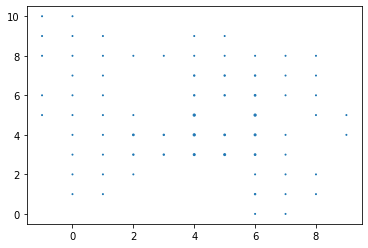

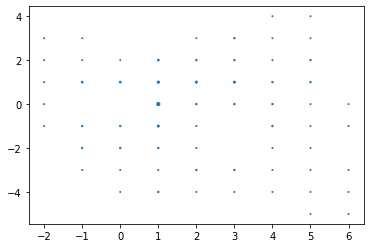

In [3]:


dish = Dish((10,10),(5,5))
dish.PERM(10, 10, 100)

plot_dish(dish, stems=False)

dish.polymer_correlation(bouqet=True)

plot_dish(dish, bouqet=True, stems=False)

corr_matrix = dish.correlation_matrix


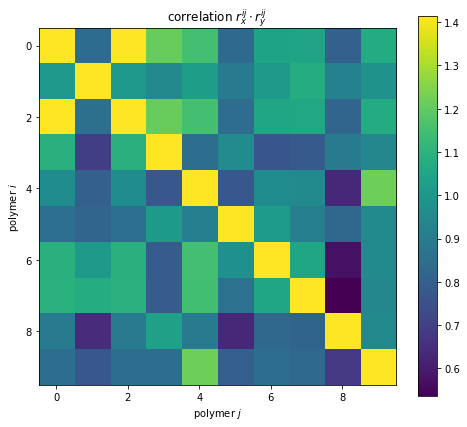

In [10]:
plt.imshow(corr_matrix, origin='upper')
plt.colorbar()
plt.xlabel(r"polymer $j$")
plt.ylabel(r"polymer $i$")
plt.title(r"correlation $r_{x}^{ij} \cdot r_{y}^{ij}$")
plt.gcf().set_size_inches(8,7)
plt.savefig('Figures/wow')
plt.show()

In [11]:
dish.correlation()
print(dish.corr_metric)

1.0161317708107862


So according to our metric of correlation polymer 24 and polymer 30 should look alike

In [6]:
polymer_24 = dish.polymers[24]
polymer_30 = dish.polymers[30]

IndexError: list index out of range

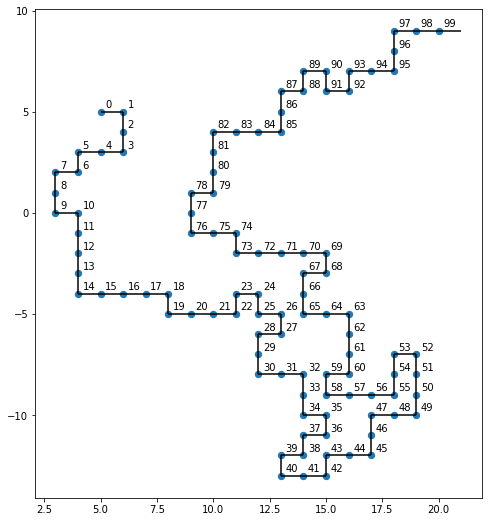

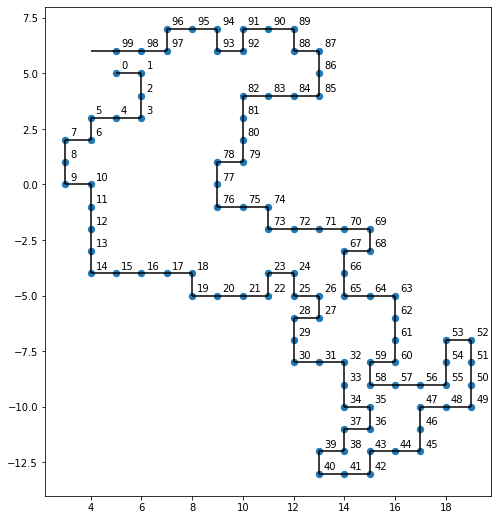

In [ ]:
plot_polymer(polymer_24)
plot_polymer(polymer_30)

They do seem to like alike until node 87!

In [ ]:
def plot_polymer(polymer: object) -> None:

    x_ = np.asarray([])
    y_ = np.asarray([])

    xlines = np.asarray([])
    xlines_posx = np.asarray([])
    xlines_posy = np.asarray([])
    ylines = np.asarray([])
    ylines_posy = np.asarray([])
    ylines_posx = np.asarray([])

    (xmax, ymax) = polymer.dimensions
    cnt = 0

    for monomer in polymer:
        start = monomer.location
        end = monomer.end_location

        x_ = np.append(x_, start[0])
        y_ = np.append(y_, start[1])

        plt.text(x_[-1]+0.2, y_[-1]+0.2, str(cnt) )
        cnt += 1
        ang = monomer.angle
        if ang == 0 or ang == 2:
            if ang == 0:
                xlines_posx = np.append(xlines_posx, start[0])
            else:
                xlines_posx = np.append(xlines_posx, end[0])
            xlines = np.append(xlines, 1)
            xlines_posy = np.append(xlines_posy, start[1])
        if ang == 1 or ang == 3:
            if ang == 1:
                ylines_posy = np.append(ylines_posy, start[1])
            else:
                ylines_posy = np.append(ylines_posy, end[1])
            ylines = np.append(ylines, 1)
            ylines_posx = np.append(ylines_posx, start[0])


    plt.scatter(x_, y_, linestyle='None', marker='o', s=40)
    plt.vlines(ylines_posx, ylines_posy, ylines_posy+1, color='black')
    plt.hlines(xlines_posy, xlines_posx, xlines_posx+1, color='black')
    plt.gcf().set_size_inches(8,9)
    plt.show()

In [12]:
dish = Dish((10,10), (5,5))
dish.find_N_polymer(10,20)

dish.correlation()

corr_matrix = dish.correlation_matrix

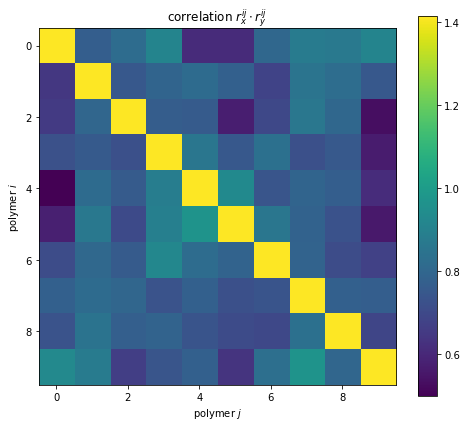

In [13]:
plt.imshow(corr_matrix, origin='upper')
plt.colorbar()
plt.xlabel(r"polymer $j$")
plt.ylabel(r"polymer $i$")
plt.title(r"correlation $r_{x}^{ij} \cdot r_{y}^{ij}$")
plt.gcf().set_size_inches(8,7)
plt.savefig('Figures/wow')
plt.show()